In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('https://s3.ap-northeast-2.amazonaws.com/data10902/petition/petition.csv', parse_dates=['start', 'end'])

In [4]:
df.shape

(395547, 8)

In [5]:
df.head(5)

,article_id,start,end,answered,votes,category,title,content
0,21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
2,23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
3,24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
4,25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."


In [6]:
df.isna().sum()

article_id    0
start         0
end           0
answered      0
votes         0
category      0
title         0
content       1
dtype: int64

In [7]:
df.describe()

,article_id,answered,votes
count,395547.000000,395547.000000,3.955470e+05
mean,251608.934635,0.000073,1.501188e+02
std,153219.216242,0.008562,4.802583e+03
min,21.000000,0.000000,0.000000e+00
25%,115236.500000,0.000000,2.000000e+00
50%,253682.000000,0.000000,5.000000e+00
75%,386137.500000,0.000000,1.500000e+01
max,517122.000000,1.000000,1.192049e+06


In [8]:
df.describe(include = np.object)

,category,title,content
count,395547,395547,395546
unique,17,346524,375224
top,정치개혁,이명박 출국금지,이명박 출국금지
freq,62750,3018,597


### 1. 카테고리 별로 올라온 청원이 몇 개인지 알아보기. 

In [9]:
df['category'].value_counts()

정치개혁           62750
기타             48682
인권/성평등         34993
안전/환경          30638
교통/건축/국토       28184
외교/통일/국방       26626
육아/교육          25537
보건복지           24848
일자리            23225
행정             20268
문화/예술/체육/언론    18207
미래             18000
경제민주화          16793
성장동력            7253
반려동물            4057
저출산/고령화대책       3584
농산어촌            1902
Name: category, dtype: int64

In [10]:
#한글 깨지는 것 해결
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

Text(0, 0.5, 'count')

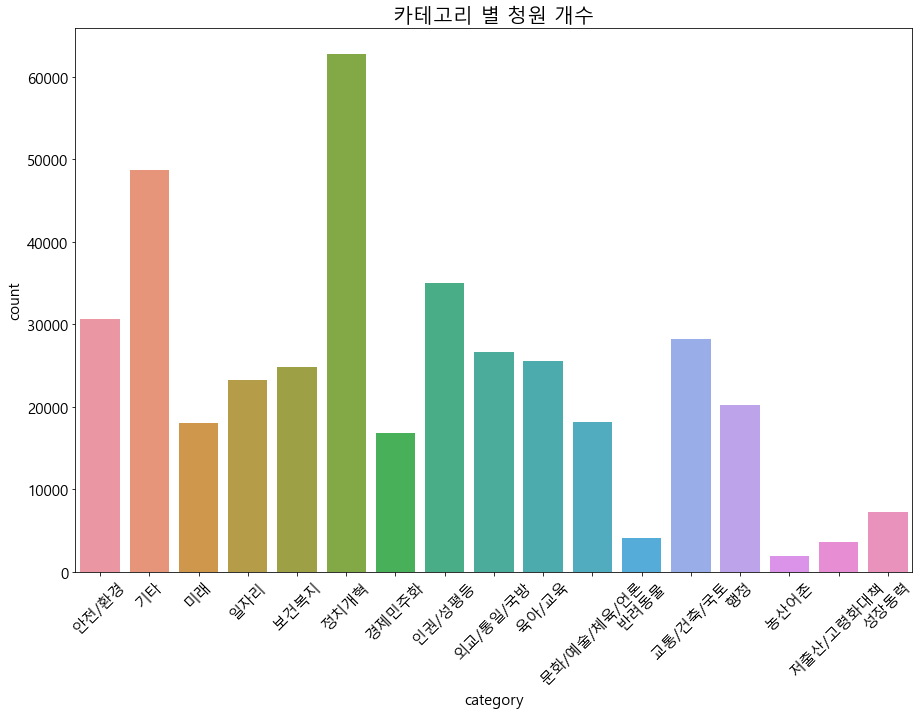

In [11]:
ax = plt.figure(figsize = (15,10))
ax = plt.xticks(rotation = 45, fontsize = 15)
ax = plt.yticks(fontsize = 15)
ax = sns.countplot(x = 'category', data = df)
ax.set_title("카테고리 별 청원 개수", fontsize = 20)
ax.set_xlabel('category', fontsize = 15)
ax.set_ylabel('count', fontsize = 15)

카테고리 별 청원 개수를 나타내는 barplot을 그려보니 정치개혁에 관한 청원이 가장 많았고 농산어촌에 관한 청원이 가장 적었다는 것을 알 수 있다.

### 2. 카테고리 별로 답변 대상 청원이 몇 개인지 알아보기.

In [12]:
# 20만건 이상 투표를 받으면 답변 대상이 된다.
df_20 = df[df['votes'] > 200000]
df_20.shape

(80, 8)

In [13]:
df_20['category'].value_counts()

인권/성평등         24
안전/환경          10
기타              8
정치개혁            8
문화/예술/체육/언론     7
외교/통일/국방        4
반려동물            4
보건복지            3
육아/교육           3
교통/건축/국토        3
경제민주화           2
성장동력            2
행정              1
미래              1
Name: category, dtype: int64

Text(0, 0.5, 'count')

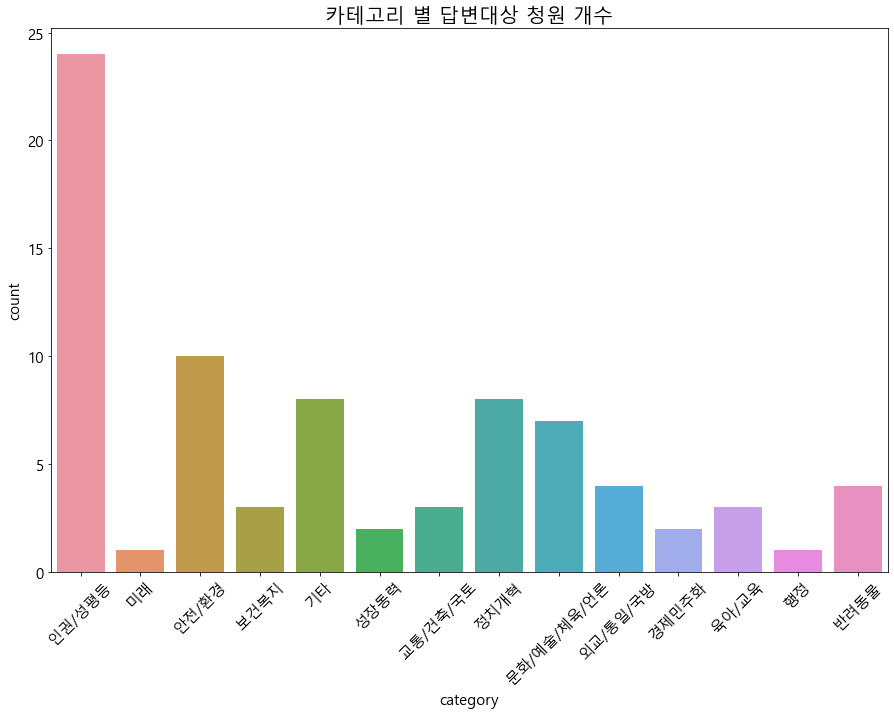

In [14]:
ax = plt.figure(figsize = (15,10))
ax = plt.xticks(rotation = 45, fontsize = 15)
ax = plt.yticks(fontsize = 15)
ax = sns.countplot(x = 'category', data = df_20)
ax.set_title("카테고리 별 답변대상 청원 개수", fontsize = 20)
ax.set_xlabel('category', fontsize = 15)
ax.set_ylabel('count', fontsize = 15)

카테고리 별로 답변대상이 된 청원의 개수를 나타내는 barplot을 통해 인권/성평등에 관한 청원이 가장 답변대상이 많이 되었고 미래와 행정에 관한 청원이 가장 답변 대상이 적게 되었다는 것을 알 수 있다.

또한 barplot에는 나오지않았지만 위에서 그린 barplot과 비교해보면 일자리, 저출산/고령화대책, 농산어촌에 관한 청원은 답변 대상이 된 청원이 없다는 것을 알 수 있다.

#### 2 - 1 카테고리 별 답변 대상 청원 비율 구하기. 

In [15]:
df2 = pd.DataFrame(df['category'].value_counts().reset_index())
df2.rename(columns = {'index' : 'category', 'category' : 'count'}, inplace = True)
df2

,category,count
0,정치개혁,62750
1,기타,48682
2,인권/성평등,34993
3,안전/환경,30638
4,교통/건축/국토,28184
5,외교/통일/국방,26626
6,육아/교육,25537
7,보건복지,24848
8,일자리,23225
9,행정,20268


In [16]:
df3 = pd.DataFrame(df_20['category'].value_counts().reset_index())
df3.rename(columns = {'index' : 'category', 'category' : 'count_20'}, inplace = True)
df3

,category,count_20
0,인권/성평등,24
1,안전/환경,10
2,기타,8
3,정치개혁,8
4,문화/예술/체육/언론,7
5,외교/통일/국방,4
6,반려동물,4
7,보건복지,3
8,육아/교육,3
9,교통/건축/국토,3


In [17]:
df_ratio = pd.merge(df2, df3, how = 'left', on = 'category')
df_ratio['ratio_20'] = df_ratio['count_20'] / df_ratio['count']
df_ratio

,category,count,count_20,ratio_20
0,정치개혁,62750,8.0,0.000127
1,기타,48682,8.0,0.000164
2,인권/성평등,34993,24.0,0.000686
3,안전/환경,30638,10.0,0.000326
4,교통/건축/국토,28184,3.0,0.000106
5,외교/통일/국방,26626,4.0,0.000150
6,육아/교육,25537,3.0,0.000117
7,보건복지,24848,3.0,0.000121
8,일자리,23225,NaN,NaN
9,행정,20268,1.0,0.000049


Text(0.5, 1.0, '카테고리 별 답변 대상 청원 비율')

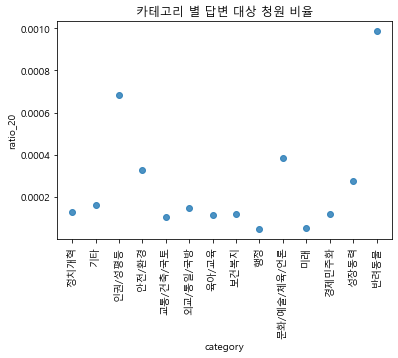

In [18]:
ratio = plt.figure()
ratio = plt.xticks(rotation = 90)
ratio = sns.regplot(x = 'category', y = 'ratio_20', data = df_ratio, fit_reg = False)
ratio.set_title("카테고리 별 답변 대상 청원 비율")

카테고리별 답변 대상 비율에 관한 산점도를 그려본 결과 반려동물에 관한 청원이 가장 많이 20만건 이상 투표를 받아 답변 대상 청원이 되었음을 알 수 있다. 

또한 카테고리 별 barplot을 보면 정치개혁에 관한 청원이 가장 많은데 정치개혁에 관한 청원이 20만건 이상 투표를 받아 답변대상 청원이 되는 비율은 낮은편임을 알 수 있다.

### 3. 답변대상 청원 중 답변 받은 청원에 대해 알아보기.

In [19]:
df_20['answered'].value_counts()

0    51
1    29
Name: answered, dtype: int64

In [20]:
df_yes = df_20[df_20['answered'] == 1]
df_yes.shape

(29, 8)

In [21]:
df_no = df_20[df_20['answered'] == 0]
df_no.shape

(51, 8)

In [22]:
df_yes['category'].value_counts()

인권/성평등         9
문화/예술/체육/언론    4
보건복지           2
안전/환경          2
교통/건축/국토       2
성장동력           2
정치개혁           2
행정             1
경제민주화          1
기타             1
미래             1
외교/통일/국방       1
육아/교육          1
Name: category, dtype: int64

In [23]:
df_no['category'].value_counts()

인권/성평등         15
안전/환경           8
기타              7
정치개혁            6
반려동물            4
문화/예술/체육/언론     3
외교/통일/국방        3
육아/교육           2
보건복지            1
경제민주화           1
교통/건축/국토        1
Name: category, dtype: int64

In [24]:
df4 = pd.DataFrame(df_yes['category'].value_counts().reset_index())
df4.rename(columns = {'index' : 'category', 'category' : 'count_answered'}, inplace = True)
df4

,category,count_answered
0,인권/성평등,9
1,문화/예술/체육/언론,4
2,보건복지,2
3,안전/환경,2
4,교통/건축/국토,2
5,성장동력,2
6,정치개혁,2
7,행정,1
8,경제민주화,1
9,기타,1


In [25]:
df5 = pd.DataFrame(df_no['category'].value_counts().reset_index())
df5.rename(columns = {'index' : 'category', 'category' : 'count_not_answered'}, inplace = True)
df5

,category,count_not_answered
0,인권/성평등,15
1,안전/환경,8
2,기타,7
3,정치개혁,6
4,반려동물,4
5,문화/예술/체육/언론,3
6,외교/통일/국방,3
7,육아/교육,2
8,보건복지,1
9,경제민주화,1


In [26]:
df6 = pd.merge(df3, df4, how = 'left', on = 'category')
df_answer_ratio = pd.merge(df6, df5, how = 'left', on = 'category')
df_answer_ratio['ratio_answered'] = df_answer_ratio['count_answered'] / df_answer_ratio['count_20']
df_answer_ratio['ratio_not_answered'] = df_answer_ratio['count_not_answered'] / df_answer_ratio['count_20']
df_answer_ratio

,category,count_20,count_answered,count_not_answered,ratio_answered,ratio_not_answered
0,인권/성평등,24,9.0,15.0,0.375000,0.625000
1,안전/환경,10,2.0,8.0,0.200000,0.800000
2,기타,8,1.0,7.0,0.125000,0.875000
3,정치개혁,8,2.0,6.0,0.250000,0.750000
4,문화/예술/체육/언론,7,4.0,3.0,0.571429,0.428571
5,외교/통일/국방,4,1.0,3.0,0.250000,0.750000
6,반려동물,4,NaN,4.0,NaN,1.000000
7,보건복지,3,2.0,1.0,0.666667,0.333333
8,육아/교육,3,1.0,2.0,0.333333,0.666667
9,교통/건축/국토,3,2.0,1.0,0.666667,0.333333


Text(0.5, 1.0, '카테고리 별 답변된 청원 비율')

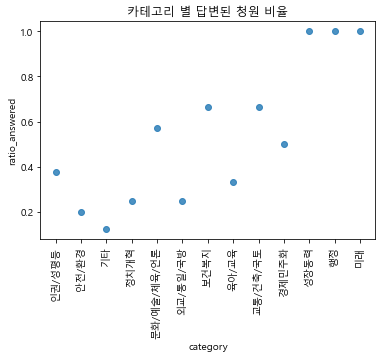

In [27]:
ratio = plt.figure()
ratio = plt.xticks(rotation = 90)
ratio = sns.regplot(x = 'category', y = 'ratio_answered', data = df_answer_ratio, fit_reg = False)
ratio.set_title("카테고리 별 답변된 청원 비율")

Text(0.5, 1.0, '카테고리 별 답변되지 않은 청원 비율')

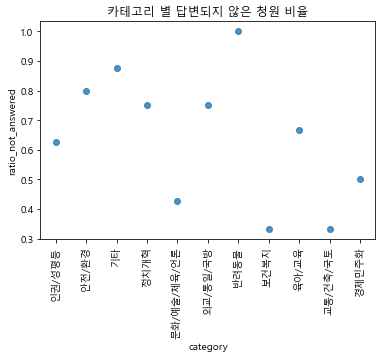

In [28]:
ratio = plt.figure()
ratio = plt.xticks(rotation = 90)
ratio = sns.regplot(x = 'category', y = 'ratio_not_answered', data = df_answer_ratio, fit_reg = False)
ratio.set_title("카테고리 별 답변되지 않은 청원 비율")

#### 그래프 합쳐서 그리기

In [29]:
df7 = pd.DataFrame(df_answer_ratio['category'][0:14])
df7['ratio'] = df_answer_ratio['ratio_answered']
df7['answer'] = 'Yes'
df8 = pd.DataFrame(df_answer_ratio['category'][0:14])
df8['ratio'] = df_answer_ratio['ratio_not_answered']
df8['answer'] = 'No'

In [30]:
df_answer = pd.concat((df7, df8) ,axis = 0)
df_answer

,category,ratio,answer
0,인권/성평등,0.375000,Yes
1,안전/환경,0.200000,Yes
2,기타,0.125000,Yes
3,정치개혁,0.250000,Yes
4,문화/예술/체육/언론,0.571429,Yes
5,외교/통일/국방,0.250000,Yes
6,반려동물,NaN,Yes
7,보건복지,0.666667,Yes
8,육아/교육,0.333333,Yes
9,교통/건축/국토,0.666667,Yes


<Figure size 432x288 with 0 Axes>

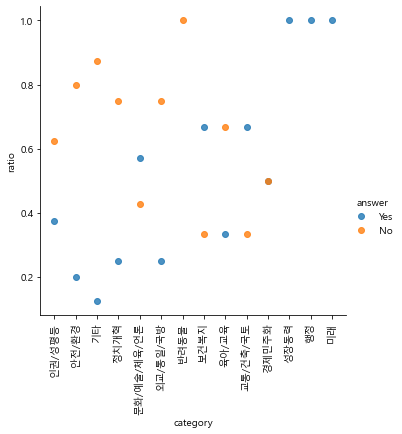

In [31]:
answer = plt.figure()
answer = sns.lmplot(x = 'category', y = 'ratio', hue = 'answer', data = df_answer, fit_reg = False)
answer = plt.xticks(rotation = 90)

위의 그래프를 통해 인권/성평등과 안전/환경에 대한 청원에 국민들이 많은 공감을 했지만(답변대상 청원의 수가 각각 24, 10으로 많은 편임) 실제 답변 비율은 높지않다는 것을 알 수 있다.

### 4. 요일별 청원 수 비교

In [32]:
df['start'] = pd.to_datetime(df['start'])
df['start']

0        2017-08-19
1        2017-08-19
2        2017-08-19
3        2017-08-19
4        2017-08-19
            ...    
395542   2019-02-04
395543   2019-02-04
395544   2019-02-04
395545   2019-02-04
395546   2019-02-04
Name: start, Length: 395547, dtype: datetime64[ns]

In [33]:
df['day_of_week'] = df['start'].dt.day_name()
df.head(5)

,article_id,start,end,answered,votes,category,title,content,day_of_week
0,21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...,Saturday
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...,Saturday
2,23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ...",Saturday
3,24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...,Saturday
4,25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ...",Saturday


Text(0, 0.5, 'Count')

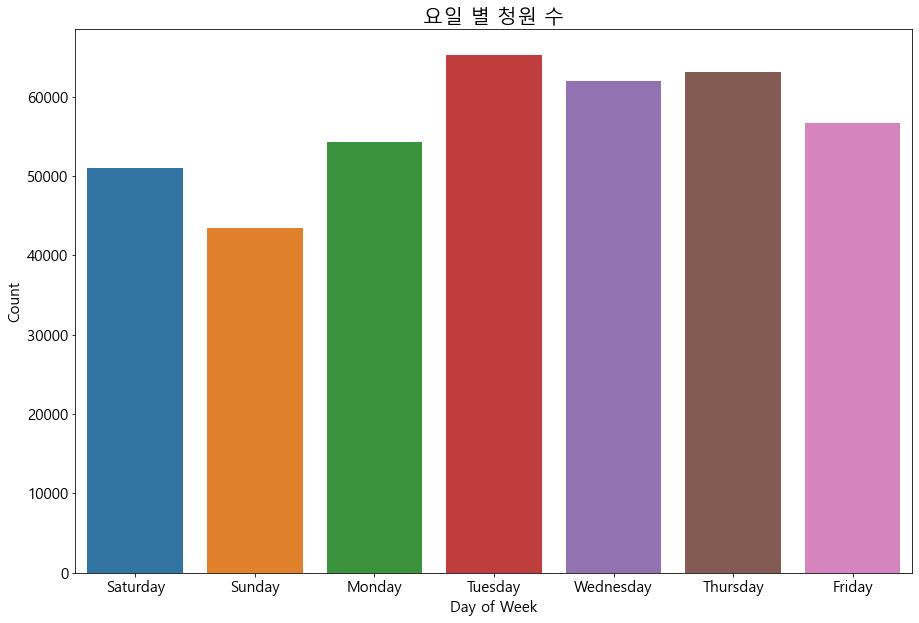

In [34]:
ax2 = plt.figure(figsize = (15,10))
ax2 = plt.xticks(fontsize = 15)
ax2 = plt.yticks(fontsize = 15)
ax2 = sns.countplot(x = 'day_of_week', data = df)
ax2.set_title("요일 별 청원 수", fontsize = 20)
ax2.set_xlabel('Day of Week', fontsize = 15)
ax2.set_ylabel('Count', fontsize = 15)

요일 별 접수된 청원 수를 나타낸 barplot을 통해 화요일에 접수된 청원의 수가 가장 많고 일요일에 접수 된 청원의 수가 가장 적다는 것을 알 수 있다.

### 5. 년도별  + 월별 청원 수 비교

In [35]:
df['year'] = df['start'].dt.year
df['month'] = df['start'].dt.month
df['year_month'] = df['year'].astype(str) + "-" + df['month'].astype(str)
df.head(5)

,article_id,start,end,answered,votes,category,title,content,day_of_week,year,month,year_month
0,21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...,Saturday,2017,8,2017-8
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...,Saturday,2017,8,2017-8
2,23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ...",Saturday,2017,8,2017-8
3,24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...,Saturday,2017,8,2017-8
4,25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ...",Saturday,2017,8,2017-8


Text(0, 0.5, 'Count')

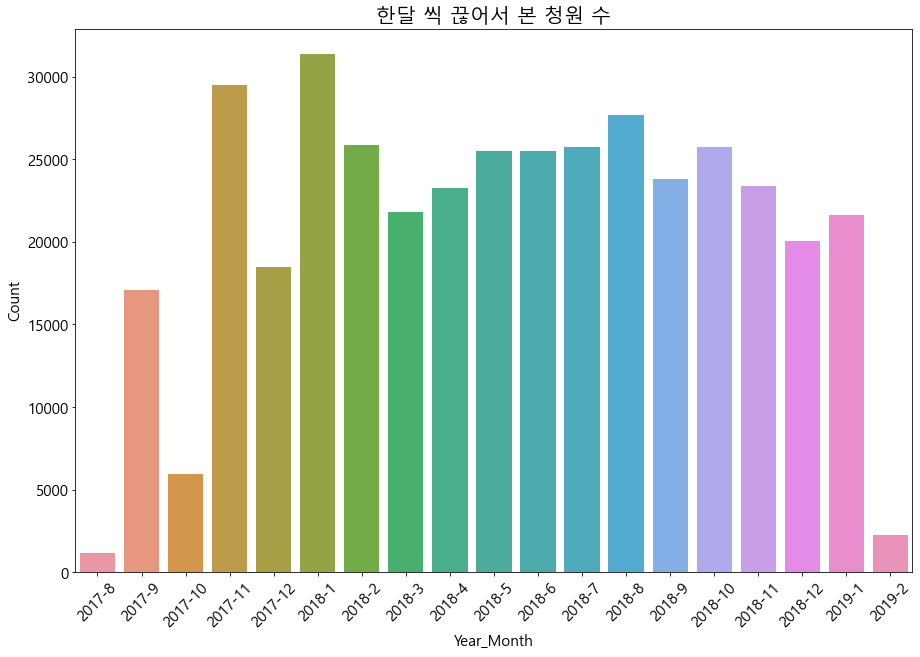

In [36]:
YM = plt.figure(figsize = (15,10))
YM = plt.xticks(rotation = 45, fontsize = 15)
YM = plt.yticks(fontsize = 15)
YM = sns.countplot(x = 'year_month', data = df)
YM.set_title("한달 씩 끊어서 본 청원 수", fontsize = 20)
YM.set_xlabel('Year_Month', fontsize = 15)
YM.set_ylabel('Count', fontsize = 15)

2017년 8월과 2019년 2월은 한달동안 접수된 모든 청원이 포함되어있지 않기 때문에 제외하고 barplot을 보면 2018년 1월에 접수된 청원이 가장 많고 2017년 10월에 접수된 청원이 가장 적다.